# ASSIGNMENT - 1

#### Data file of a few marketing campaigns containing data from Oct’19 to July’20. This data is from Google and Facebook campaigns which shows the performance of different Age-groups for different dimensions.

##### Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

##### Load data and store in dataframe df

In [2]:
path=r"C:\Users\Arjun\Desktop\Data Analyst Assignment (1).xlsx"

df=pd.read_excel(path,sheet_name="Assignment-1")

df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [3]:
df.shape

(16834, 16)

In [4]:
df.dtypes

Date                    datetime64[ns]
product                         object
phase                           object
campaign_platform               object
campaign_type                   object
communication_medium            object
subchannel                      object
audience_type                   object
creative_type                   object
creative_name                   object
device                          object
age                             object
spends                         float64
impressions                      int64
clicks                           int64
link_clicks                    float64
dtype: object

### Identify the missing values

##### Convert "' - " to NaN

In [5]:
df.replace("'-", np.nan, inplace = True)
df.head(5)

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,18-24,53.31,10,2,0.0


In [6]:
missing_data = df.isnull()
missing_data.head(5)

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Date
False    16834
Name: Date, dtype: int64

product
False    16834
Name: product, dtype: int64

phase
False    16834
Name: phase, dtype: int64

campaign_platform
False    16834
Name: campaign_platform, dtype: int64

campaign_type
False    16834
Name: campaign_type, dtype: int64

communication_medium
False    16834
Name: communication_medium, dtype: int64

subchannel
False    16834
Name: subchannel, dtype: int64

audience_type
True     15101
False     1733
Name: audience_type, dtype: int64

creative_type
True     15101
False     1733
Name: creative_type, dtype: int64

creative_name
True     15101
False     1733
Name: creative_name, dtype: int64

device
False    16834
Name: device, dtype: int64

age
False    16834
Name: age, dtype: int64

spends
False    16834
Name: spends, dtype: int64

impressions
False    16834
Name: impressions, dtype: int64

clicks
False    16834
Name: clicks, dtype: int64

link_clicks
False    16288
True       546
Name: link_clicks, dtype: int64



## Data Analysis

#### Marketing platforms on which campaigns are running majorly are Google Ads and Facebook Ads. Let's compare how popular each platform is.

In [9]:
df_plat=df["campaign_platform"].value_counts()
df_plat

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64

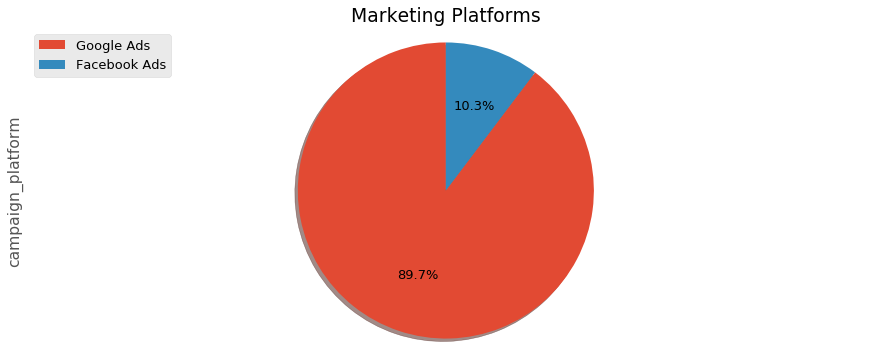

In [11]:
df_plat.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%', 
            startangle=90,     
            shadow=True,
            labels=None)

mpl.rcParams['font.size'] = 13

plt.legend(labels=df_plat.index, loc='upper left') 
plt.title("Marketing Platforms")
plt.axis("equal")
plt.show()

Observing the visuals, we could say that campaigns are running mostly on Google Ads which is 89.7% while the campaigns on Facebook Ads are 10.3%.

--The type of campaign for Google Ads and Facebook Ads are "Google Search" and "Facebook Conversion" respectively.

--The way of connecting to people in Marketing campaigns either via some Keywords or Creatives for Google searches and Facebook Conversions respectively.

### Sub Channel

##### Sub channel is under Google Search that indicates which type of keywords have been targeted. Hence, let's find out which sub channel is more frequent.

In [12]:
df_sub=df[df["campaign_platform"]=="Google Ads"]
df_sub.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,NaN,NaN,NaN,Desktop,18-24,53.31,10,2,0.0


In [13]:
df_sub.shape

(15101, 16)

In [14]:
df_sub=df_sub["subchannel"]
df_sub.value_counts()

Brand         7853
Generic       4544
Competitor    2704
Name: subchannel, dtype: int64

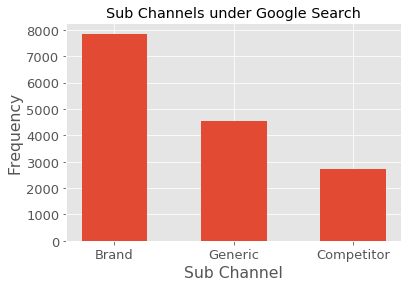

In [15]:
X=["Brand","Generic","Competitor"]
Y=[7853,4544,2704]

plt.bar(X,Y,width=0.55)

mpl.rcParams['font.size'] = 10

plt.title("Sub Channels under Google Search")
plt.ylabel("Frequency")
plt.xlabel("Sub Channel")
plt.show()

We can now say that, "Brand"  is more frequently use and then "Generic", "Competitor" in descending order.

### Age group peformance

Numerical data like Spends, Impressions, Links and Link Clicks would be helpful to find the performance of different age groups.

We can calculate the correlation between variables of type "int64" or "float64".

In [16]:
df.corr()

,spends,impressions,clicks,link_clicks
spends,1.000000,0.744552,0.838371,0.697201
impressions,0.744552,1.000000,0.917512,0.963108
clicks,0.838371,0.917512,1.000000,0.925588
link_clicks,0.697201,0.963108,0.925588,1.000000


(0, 10737.87920972649)

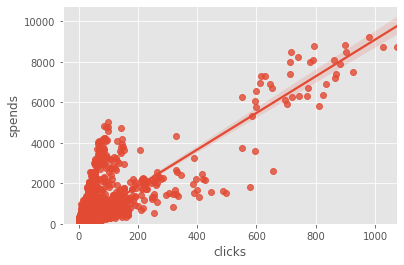

In [17]:
sns.regplot(x="clicks", y="spends", data=df)
plt.ylim(0,)

We can see that Spends share a strong positive correlation with the clicks.

#### Let's now look at how these campaigns effect on different age groups

In [18]:
df_age=df[["age","impressions","clicks","link_clicks"]].groupby(["age"]).mean()
df_age

,impressions,clicks,link_clicks
age,,,
18-24,56.600324,11.417476,0.000000
25-34,1070.979012,32.881821,8.627649
35-44,309.078185,11.285166,2.534682
45-54,81.296919,3.425770,0.782383
55-64,8.461013,0.857143,0.040763
65 or more,6.557125,1.189987,0.000000
Undetermined,107.121036,10.565352,0.000000


Let's get a better picture 

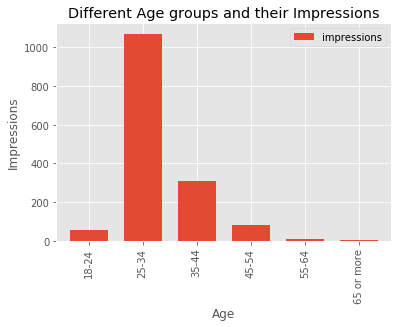

In [21]:
df_age.iloc[:6,:1].plot(kind="bar",width=0.7)

plt.title("Different Age groups and their Impressions")
plt.ylabel("Impressions")
plt.xlabel("Age")
plt.show()

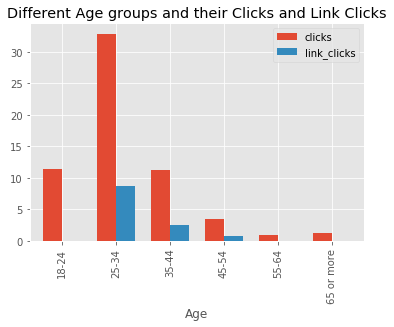

In [24]:
df_age.iloc[:6,1:3].plot(kind="bar",width=0.7)

plt.title("Different Age groups and their Clicks and Link Clicks")
plt.xlabel("Age")
plt.show()

From these visuals, we can come to a conclusion that, performance of people who age between 25-34 years is high followed by the people who age between 35-44 years. 

### Type of Ad and Audience attracted

In [26]:
df_aud=df[["audience_type","creative_type"]]
df_aud.dropna(inplace=True)
df_aud

C:\Users\Arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,audience_type,creative_type
2009,Audience 2,Carousal
2010,Audience 2,Carousal
2011,Audience 2,Carousal
2012,Audience 2,Carousal
2013,Audience 2,Image
...,...,...
13808,Audience 1,Image
13809,Audience 1,Image
13810,Audience 1,Image
13811,Audience 1,Image


In [28]:
df_aud1=df_aud[df_aud["audience_type"]=="Audience 1"]
df_aud1["creative_type"].value_counts()

Image       539
Carousal    274
Name: creative_type, dtype: int64

Similarly,

In [29]:
df_aud2=df_aud[df_aud["audience_type"]=="Audience 2"]
df_aud2["creative_type"].value_counts()

Image       460
Carousal    278
Name: creative_type, dtype: int64

In [30]:
df_aud3=df_aud[df_aud["audience_type"]=="Audience 3"]
df_aud3["creative_type"].value_counts()

Image       131
Carousal     51
Name: creative_type, dtype: int64

In [31]:
data = {"Audience Type":["Audience 1","Audience 2", "Audience 3"],"Image":[539,460,131],"Carousal":[274,278,51]}

df_audi=pd.DataFrame.from_dict(data)

df_audi

,Audience Type,Image,Carousal
0,Audience 1,539,274
1,Audience 2,460,278
2,Audience 3,131,51


In [32]:
df_audi.set_index("Audience Type")

,Image,Carousal
Audience Type,,
Audience 1,539,274
Audience 2,460,278
Audience 3,131,51


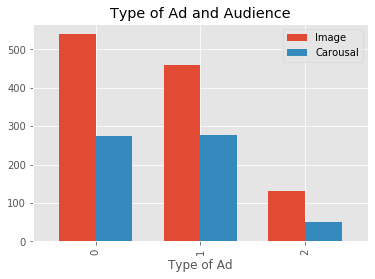

In [35]:
df_audi.plot(kind="bar",width=0.7)

plt.title("Type of Ad and Audience")
plt.xlabel("Type of Ad")
plt.show()

Image type of ads are most commonly used for the advertising campaigns.

Audience type1 and Audience type 2 are mostly targetted compared to Audience type 3.

### Monthly Analysis

In [36]:
df_date=df[["Date","spends"]]
df_date.head()

,Date,spends
0,2019-10-16,0.00
1,2019-10-16,0.00
2,2019-10-16,0.00
3,2019-10-16,14.63
4,2019-10-18,53.31


In [37]:
df_date['year'] = pd.DatetimeIndex(df['Date']).year
df_date['month'] = pd.DatetimeIndex(df['Date']).month
df_date.head(5)

C:\Users\Arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arjun\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,spends,year,month
0,2019-10-16,0.00,2019,10
1,2019-10-16,0.00,2019,10
2,2019-10-16,0.00,2019,10
3,2019-10-16,14.63,2019,10
4,2019-10-18,53.31,2019,10


In [38]:
df_date=df_date[["spends","month"]].groupby(["month"]).sum()
df_date

,spends
month,
1,648650.100000
2,630323.359999
3,430148.450001
4,14926.100000
5,14571.590000
6,14286.490000
7,3023.320000
10,16017.780000
11,112818.440000


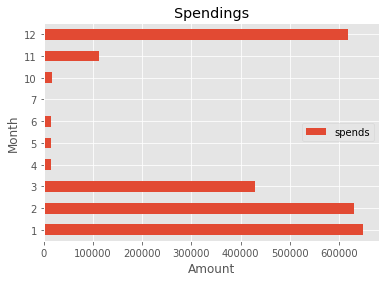

In [39]:
df_date.plot(kind="barh")

plt.title("Spendings")
plt.ylabel("Month")
plt.xlabel("Amount")
plt.show()

The visuals illustrates that the people are more active on advertisements early in the year and at the end of the year.

January, February, March and December are the year where performance of people are high on the advertisement campaigns.